<a href="https://colab.research.google.com/github/mvirag2000/Machine-Learning/blob/master/Copy_of_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple Linear Regression using Gradient Descent
In this notebook we will demonstrate the principal of gradient descent in isolation, without the other machinery of machine learning, using a well understood example that can also be solved analytically.

These figures are from the Westwood Company exercise, Neter Wasserman Kutner Third Edition.  They are supposed to represent labor hours (Y) as a function of production lot size (X).  The goal is to fit a "least squares line" to the data.

In [ ]:
import numpy as np

x = np.array([30, 20, 60, 80, 40, 50, 60, 30, 70, 60], dtype=float)
y = np.array([73, 50, 128, 170, 87, 108, 135, 69, 148, 132], dtype=float)

First, let's solve the problem analytically using the standard formula.  Note that, while x_mean is a real number, X and Y are 1D arrays (vectors).  Python is good for machine learning because it automatically handles vector arithmetic.

In [ ]:
x_mean = np.average(x)
y_mean = np.average(y)
SSxy = sum((x - x_mean) * (y - y_mean))
SSxx = sum((x - x_mean)**2)
b1 = SSxy / SSxx
b0 = y_mean - b1 * x_mean
y_pred = b1 * x + b0
SSE = sum((y_pred - y)**2)
print("The slope coefficient is " + str(b1))
print("The y-intercept is " + str(b0))
print("The sum of squared errors is " + str(SSE))

The slope coefficient is 2.0
The y-intercept is 10.0
The sum of squared errors is 60.0



The vector treatment of this problem is given in NWK Chap. 6.
Here is the X-Y plot with the fitted line:

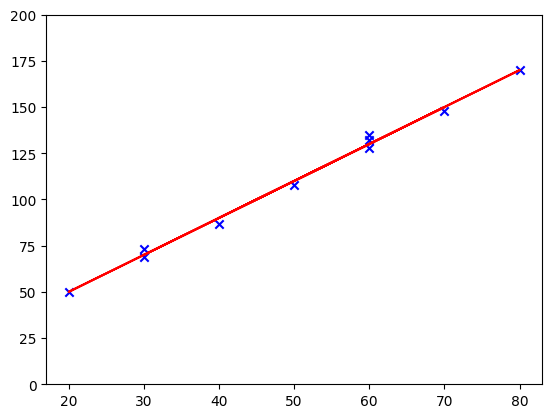

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x,y,color='b',marker='x')
ax.plot(x,y_pred,color='r')
ax.axes.set_ylim(0,200)
plt.show()

Now let's set up to solve it iteratively.  We start by normalizing the data.  This is because the scales of X and Y are arbitrary.  If we don't normalize, we may have a distorted surface where the minimum is hard to find.

In [ ]:
x_stdev = np.sqrt(np.average((x - x_mean)**2))
y_stdev = np.sqrt(np.average((y - y_mean)**2))
x_norm = (x - x_mean) /x_stdev
y_norm = (y - y_mean) /y_stdev

Because this is an old problem, everyone knows that SSE is a paraboloid in b1, b0. The "objective" is to find (b1, b0) for which SSE is minimized.  Machine learning uses other objectives, like RMSE, but SSE is traditional here.

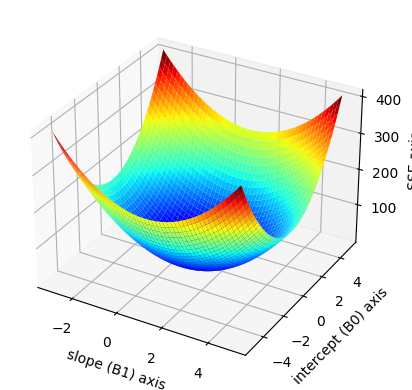

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
def SSE(b1, b0, x, y):
    y_pred = b1 * x + b0
    return sum((y_pred - y)**2)
SSE_plot = np.empty(shape=[50, 50])
b1_plot = np.linspace(-3, 5, 50, dtype = float)
b0_plot = np.linspace(-5, 5, 50, dtype = float)
B1, B0 = np.meshgrid(b1_plot, b0_plot)
for i in range(50):
    for j in range(50):
        SSE_plot[j, i] = SSE(b1_plot[i], b0_plot[j], x_norm, y_norm)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(B1, B0, SSE_plot, cmap=cm.jet)
ax.set_xlabel('slope (B1) axis')
ax.set_ylabel('intercept (B0) axis')
ax.set_zlabel('SSE axis')
plt.show()

To see why we normalize, try replotting that paraboloid with x and y instead of x_norm and y_norm.

Next, we roll down the grade into the hollow.  This is the everyday usage of the English word "gradient."  We happen to have formulas for the db1 and db2 gradients, which we apply iteratively.

In [ ]:
b1 = 5
b0 = 5
n = x_norm.shape[0]
learning_rate = 0.0015
for i in range(1, 401):
  y_pred = b1 * x_norm + b0
  S = np.sum((y_pred - y_norm)**2)
  if i % 25 == 0:
    print("Cost after iteration {}: {}".format(i, np.squeeze(S)))
  db1 = 2 * (b1 * np.sum(x_norm**2) + b0 * np.sum(x_norm) - np.sum(x_norm * y_norm) )
  db0 = 2 * (n * b0 + b1 * np.sum(x_norm) - np.sum(y_norm) )
  b1 = b1 - learning_rate * db1
  b0 = b0 - learning_rate * db0

Cost after iteration 25: 95.10734154443516
Cost after iteration 50: 20.773963723308107
Cost after iteration 75: 4.564427787903373
Cost after iteration 100: 1.029689249942048
Cost after iteration 125: 0.25888516390656396
Cost after iteration 150: 0.09079948156592083
Cost after iteration 175: 0.05414581415578347
Cost after iteration 200: 0.04615291841413283
Cost after iteration 225: 0.044409944604117145
Cost after iteration 250: 0.04402986236601537
Cost after iteration 275: 0.04394697959010084
Cost after iteration 300: 0.0439289057264612
Cost after iteration 325: 0.043924964442602646
Cost after iteration 350: 0.043924104985058665
Cost after iteration 375: 0.043923917567126755
Cost after iteration 400: 0.04392387669776508


That seems to have found a minimum around 0.044 so let's un-norm the b's and see how they compare to the known solution

In [ ]:
b1 = b1 * y_stdev / x_stdev
b0 = y_mean - b1 * x_mean
y_pred = b1 * x + b0 # Back to the original X and Y
SSE = sum((y_pred - y)**2)
print("The slope coefficient is %1.2f" % b1)
print("The y-intercept is %1.2f" % b0)
print("The sum of squared errors is %2.2f" % SSE)

The slope coefficient is 2.00
The y-intercept is 10.00
The sum of squared errors is 60.00


These are the same as the analytical results.

Obviously you wouldn't really use gradient descent to find the minimum of a paraboloid, but it's the thing to do when you're optimizing hundreds of parameters in multiple dimensions.